In [2]:
library(GWmodel)
library(dplyr)
library(rgdal)

载入需要的程辑包：maptools

载入需要的程辑包：sp

Checking rgeos availability: TRUE

载入需要的程辑包：robustbase

载入需要的程辑包：Rcpp

载入需要的程辑包：spatialreg

载入需要的程辑包：spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

载入需要的程辑包：Matrix

Welcome to GWmodel version 2.2-3.
The new version of GWmodel 2.2-4 now is ready


载入程辑包：‘GWmodel’


The following objects are masked from ‘package:stats’:

    BIC, fitted



载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.0, released 2020/10/26
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VER

In [3]:
house.price <- read.csv("house_price_coord.csv") %>%
  filter(housing_use == 1 & floor != "NONE" & lon > 114.1 & lon < 114.5)
house.price$building_type <- factor(house.price$building_type)
house.price$building_structure <- factor(house.price$building_structure)
house.price$decoration_situation <- factor(house.price$decoration_situation)
house.price$transaction_ownership <- factor(house.price$transaction_ownership)
house.price$structure_type <- factor(house.price$structure_type)
house.price$floor <- factor(house.price$floor)
house.price$price <- log(house.price$price)
house.price$charge <- log(house.price$charge)
house.price$building_area <- log(house.price$building_area)
house.price$d_busines4 <- log(house.price$d_busines4 + 1)
house.price$d_green <- log(house.price$d_green + 1)
house.price$d_waterthree <- log(house.price$d_waterthree + 1)
house.price$d_waternew <- log(house.price$d_waternew + 1)
house.price$d_waterselected <- log(house.price$d_waterselected + 1)
house.price$d_high <- log(house.price$d_high)
house.price$d_middle <- log(house.price$d_middle)
house.price$d_subwayonly <- log(house.price$d_subwayonly)
house.price$d_supermarket <- log(house.price$d_asupermarket)
house.price$d_kindergarden <- log(house.price$d_akindergarden)
house.price$d_commonmall <- log(house.price$d_acommonmall)
house.price$d_university <- log(house.price$d_auniversity)
house.price$d_primaryschool <- log(house.price$d_aprimaryschool)
house.price$d_shoppingmall <- log(house.price$d_ashoppingmall)
head(house.price)

,X,id,lon,lat,price,group,building_area,building_type,building_structure,decoration_situation,⋯,d_acommonmall,d_akindergarden,d_asupermarket,group_count,d_supermarket,d_kindergarden,d_commonmall,d_university,d_primaryschool,d_shoppingmall
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,104101066680,114.31,30.5233,9.948652,0,4.443474,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
2,1,104101127856,114.31,30.5233,9.964630,0,3.688379,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
3,2,104100890629,114.31,30.5233,9.920984,0,4.476768,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
4,3,104101117479,114.31,30.5233,9.980958,0,4.742843,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
5,4,104101202944,114.31,30.5233,9.904037,0,3.688379,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
6,5,104100740242,114.31,30.5233,10.001249,0,3.708927,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265


In [4]:
house.price.dummy <- house.price
dummy_vars = c("building_type", "building_structure", "decoration_situation", "transaction_ownership", "structure_type", "floor")
for (varn in dummy_vars) {
  value_range <- unique(house.price.dummy[,varn])
  for (value_name in value_range) {
    value_var_name <- paste(varn, value_name, sep = "")
    house.price.dummy[,value_var_name] <- 0
    house.price.dummy[which(house.price.dummy[,varn] == value_name), value_var_name] = 1
  }
}
coordinates(house.price.dummy) <- ~lon + lat

# GWR 分析

In [5]:
### 参数设置
house.gwr.cfg <- list(
    kernel = "bisquare",
    adaptive = "adaptive"
)

In [6]:
house.gwr.formula <- price ~ d_waterthree + d_busines4 + charge + d_aprimaryschool + d_akindergarden + building_area + floor高楼层
house.gwr.bw <- bw.gwr(house.gwr.formula, data = house.price.dummy, longlat = T, 
                       kernel = house.gwr.cfg$kernel, adaptive = house.gwr.cfg$adaptive == "adaptive", 
                       parallel.method = "omp")
house.gwr <- gwr.basic(house.gwr.formula, data = house.price.dummy, longlat = T, bw = house.gwr.bw, 
                       kernel = house.gwr.cfg$kernel, adaptive = house.gwr.cfg$adaptive == "adaptive", 
                       parallel.method = "omp")
house.gwr

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Adaptive bandwidth: 12124 CV score: 460.8662 
Adaptive bandwidth: 7501 CV score: 417.1825 
Adaptive bandwidth: 4643 CV score: 382.2782 
Adaptive bandwidth: 2877 CV score: 346.4913 
Adaptive bandwidth: 1785 CV score: 302.526 
Adaptive bandwidth: 1111 CV score: 262.0585 
Error in gw_cv_all_omp(X, Y, dp.locat, DM.given, dMat, p, theta, longlat,  : 
  std::exception
Adaptive bandwidth: 693 CV score: Inf 
Adaptive bandwidth: 1368 CV score: 280.0323 
Adaptive bandwidth: 951 CV score: 249.4444 
Adaptive bandwidth: 853 CV score: 240.6945 
Adaptive bandwidth: 791 CV score: 235.1601 
Error in gw_cv_all_omp(X, Y, dp.locat, DM.given, dMat, p, theta, longlat,  : 
  std::exception
Adaptive bandwidth: 754 CV score: Inf 
Adaptive bandwidth: 815 CV score: 237.2379 
Error in gw_cv_all_omp(X, Y, dp.locat, DM.given, dMat, p, theta, longlat,  : 
  std::exception
Adaptive bandwidth

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-06-15 18:20:35 
   Call:
   gwr.basic(formula = house.gwr.formula, data = house.price.dummy, 
    bw = house.gwr.bw, kernel = house.gwr.cfg$kernel, adaptive = house.gwr.cfg$adaptive == 
        "adaptive", longlat = T, parallel.method = "omp")

   Dependent (y) variable:  price
   Independent variables:  d_waterthree d_busines4 charge d_aprimaryschool d_akindergarden building_area floor高楼层
   Number of data points: 19605
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
     Min       1Q   Median       3

In [7]:
house.gwr.tv <- select(house.gwr$SDF@data, ends_with("_TV"))
house.gwr.edf <- house.gwr$GW.diagnostic$edf
house.gwr.tp <-  sapply(house.gwr.tv, function (x) {
    (1 - pt(abs(x), house.gwr.edf))*2
})
colnames(house.gwr.tp) <- gsub("TV$", "TP", colnames(house.gwr.tv))
head(house.gwr.tp)

Intercept_TP,d_waterthree_TP,d_busines4_TP,charge_TP,d_aprimaryschool_TP,d_akindergarden_TP,building_area_TP,floor高楼层_TP
0,0,0,1.684661e-10,0.002416112,0,0.0001870103,0.09722617
0,0,0,1.684661e-10,0.002416112,0,0.0001870103,0.09722617
0,0,0,1.684661e-10,0.002416112,0,0.0001870103,0.09722617
0,0,0,1.684661e-10,0.002416112,0,0.0001870103,0.09722617
0,0,0,1.684661e-10,0.002416112,0,0.0001870103,0.09722617
0,0,0,1.684661e-10,0.002416112,0,0.0001870103,0.09722617


# 制图

In [8]:
library(tmap)

In [9]:
### 导入底图
wuhan <- readOGR("Map/WuhanDistinct.shp")

OGR data source with driver: ESRI Shapefile 
Source: "/home/hpdell/文档/House-HLM-GWR/Map/WuhanDistinct.shp", layer: "WuhanDistinct"
with 13 features
It has 6 fields
Integer64 fields read as strings:  FID_市界 FID_Wuhan 


## 回归系数

In [11]:
### 生成制图数据
house.price.draw <- aggregate(
      cbind(lon, lat, Intercept, d_waterthree, d_busines4, charge, 
            d_aprimaryschool, d_akindergarden, building_area, floor高楼层, 
            Intercept_TP, d_waterthree_TP, d_busines4_TP, charge_TP, 
            d_aprimaryschool_TP, d_akindergarden_TP, building_area_TP, floor高楼层_TP) ~ group,
      data = cbind(group = house.price.dummy$group, house.gwr$SDF@coords, house.gwr$SDF@data, house.gwr.tp),
      FUN = median
)
coordinates(house.price.draw) <- ~ lon + lat
proj4string(house.price.draw) <- CRS("+proj=longlat +datum=WGS84")
names(house.price.draw@data) <- c("Group", "Intercept", "d.Water", "d.Commercial", "Fee", 
                                  "d.PrimarySchool", "d.Kindergarten", "BuildingArea", "Floor.High",
                                  "Intercept_TP", "d.Water_TP", "d.Commercial_TP", "Fee_TP", 
                                  "d.PrimarySchool_TP", "d.Kindergarten_TP", "BuildingArea_TP", "Floor.High_TP")
head(house.price.draw@data)

,Group,Intercept,d.Water,d.Commercial,Fee,d.PrimarySchool,d.Kindergarten,BuildingArea,Floor.High,Intercept_TP,d.Water_TP,d.Commercial_TP,Fee_TP,d.PrimarySchool_TP,d.Kindergarten_TP,BuildingArea_TP,Floor.High_TP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,9.81280,20.008665,38.325236,0.05693099,17.4460548,-53.303542,-0.072584699,-0.019698528,0,0.000000e+00,0.00000000,1.684661e-10,0.002416112,0.0000000000,0.0001870103,0.09722617
2,1,10.27655,34.986132,-4.230013,-0.02811202,-3.2291037,-37.682416,-0.222841932,-0.002130209,0,7.996400e-06,0.84226636,7.962640e-02,0.001591725,0.1578123420,0.0000000000,0.81840067
3,2,10.00941,-2.118360,-1.984542,0.08047919,-5.6939271,-4.419194,-0.016917697,0.009932629,0,2.985504e-02,0.04689424,0.000000e+00,0.001727961,0.0002730289,0.3358452771,0.35319038
4,4,10.40343,22.918809,7.354003,0.03453509,0.2285804,-29.075032,-0.338434984,-0.025048110,0,3.400521e-03,0.19231710,4.543960e-03,0.914349641,0.0095062970,0.0000000000,0.02365949
5,6,10.17518,-9.773134,90.640297,0.09583632,6.3969195,-10.888436,0.007530367,-0.002658985,0,1.843546e-09,0.00000000,0.000000e+00,0.160802355,0.0093986029,0.5940462187,0.78442301
6,9,10.55379,37.305189,15.006170,0.02519817,5.1725735,-57.755222,-0.339011252,0.008233610,0,6.822909e-04,0.03783413,9.824404e-02,0.024128793,0.0001014000,0.0000000000,0.44734493


In [15]:
select(house.price.draw@data, ends_with("_TP")) %>% sapply(function (x) {
    length(x[x > 0.05])
})

Intercept_TP         d.Water_TP    d.Commercial_TP             Fee_TP 
                 0                170                187                 48 
d.PrimarySchool_TP  d.Kindergarten_TP    BuildingArea_TP      Floor.High_TP 
               222                280                289                601

In [25]:
### 基本图层
house.figure.base <- tm_layout(legend.outside = F, legend.position = c(0, 0), legend.frame = "white", outer.margins = 0, frame = FALSE) +
    tm_shape(wuhan, bbox = house.price.draw@bbox, is.master = T) + tm_borders("black", lwd = 1) +
    tm_compass(position = c(0, 1), just = c(0, 1)) +
    tm_scale_bar(position = c(1, 0), just = c(1, 0))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


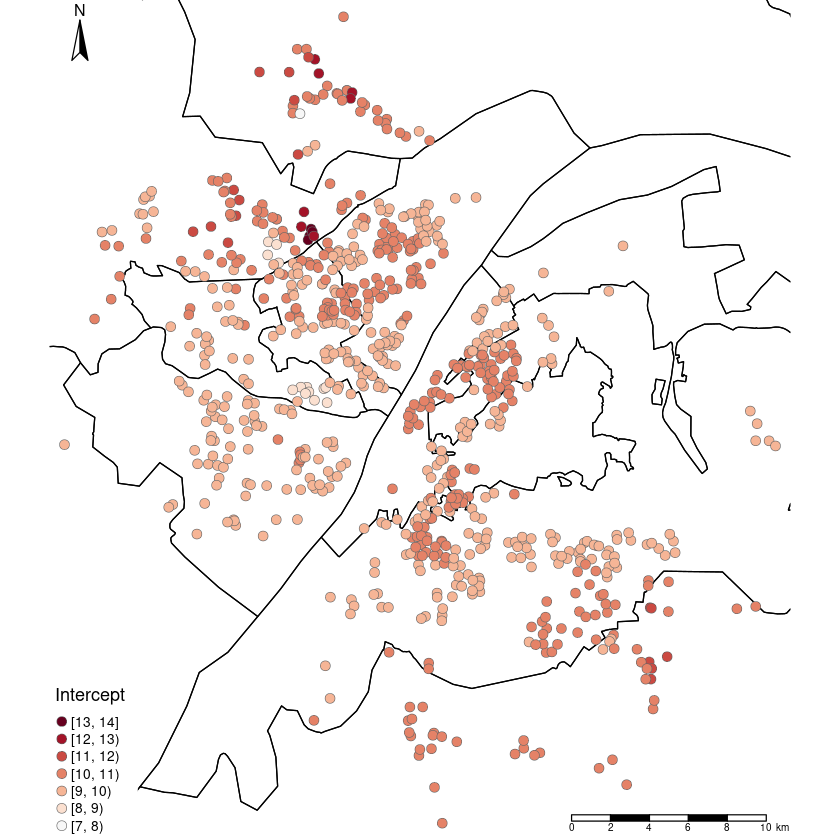

In [58]:
house.figure.Intercept <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$Intercept_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "Intercept", size = 0.3, palette = "-RdBu", n = 5, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"), style = "pretty")
house.figure.Intercept

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


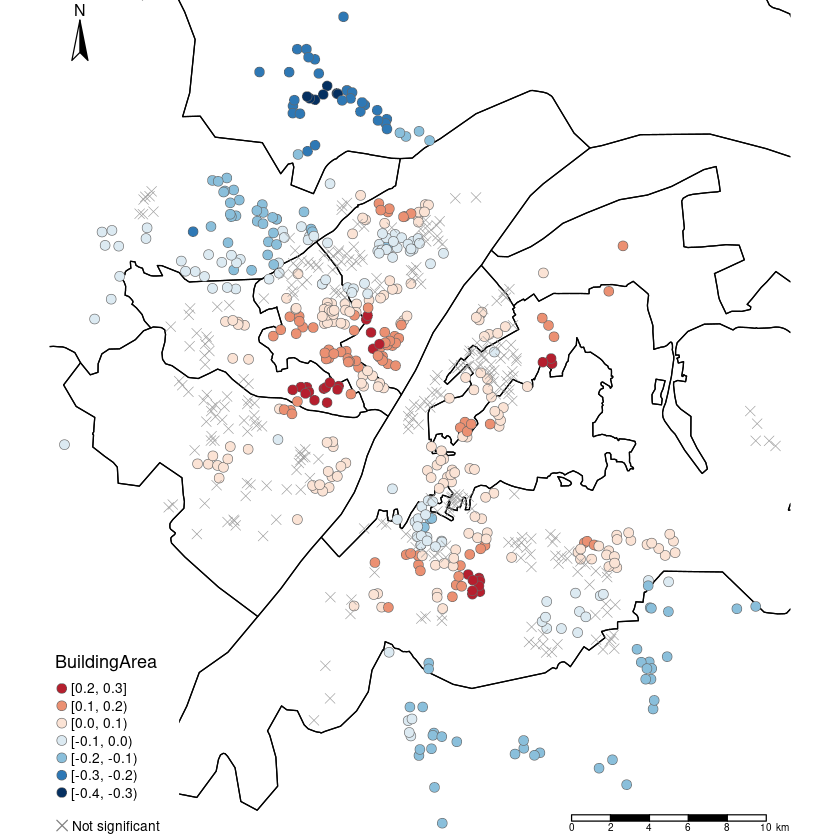

In [46]:
house.figure.BuildingArea <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$BuildingArea_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "BuildingArea", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = with(house.price.draw@data, c(min(BuildingArea), seq(-0.3, 0.3, by = 0.15), max(BuildingArea)))) +
    tm_shape(house.price.draw[house.price.draw@data$BuildingArea_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = house.breaks.BuildingArea) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.BuildingArea

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


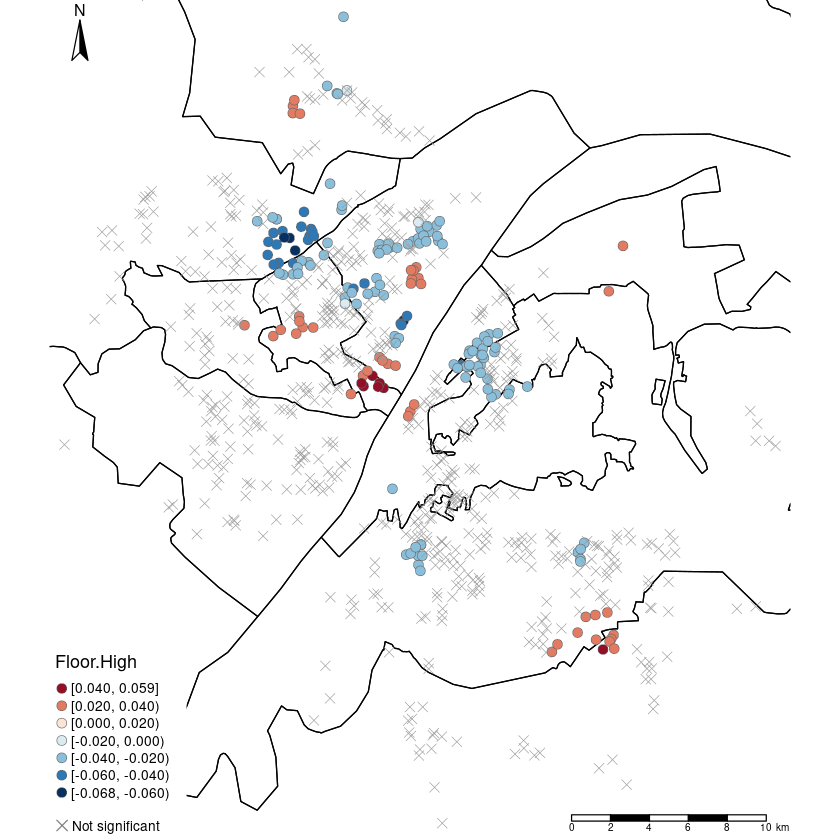

In [47]:
house.figure.Floor.High <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$Floor.High_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "Floor.High", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(Floor.High), seq(-0.06, 0.04, by = 0.02), max(Floor.High)))) + 
    tm_shape(house.price.draw[house.price.draw@data$Floor.High_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = house.breaks.Floor.High) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.Floor.High

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


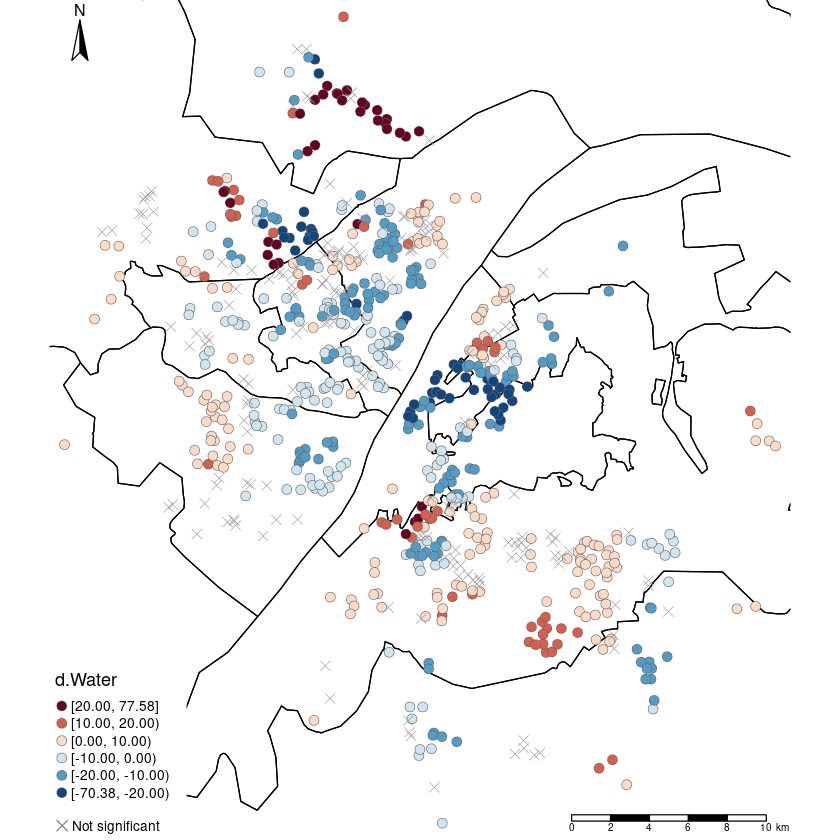

In [48]:
house.figure.d.Water <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$d.Water_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "d.Water", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Water), seq(-20, 20, by = 10), max(d.Water)))) +
    tm_shape(house.price.draw[house.price.draw@data$d.Water_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = house.breaks.Floor.High) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.d.Water

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


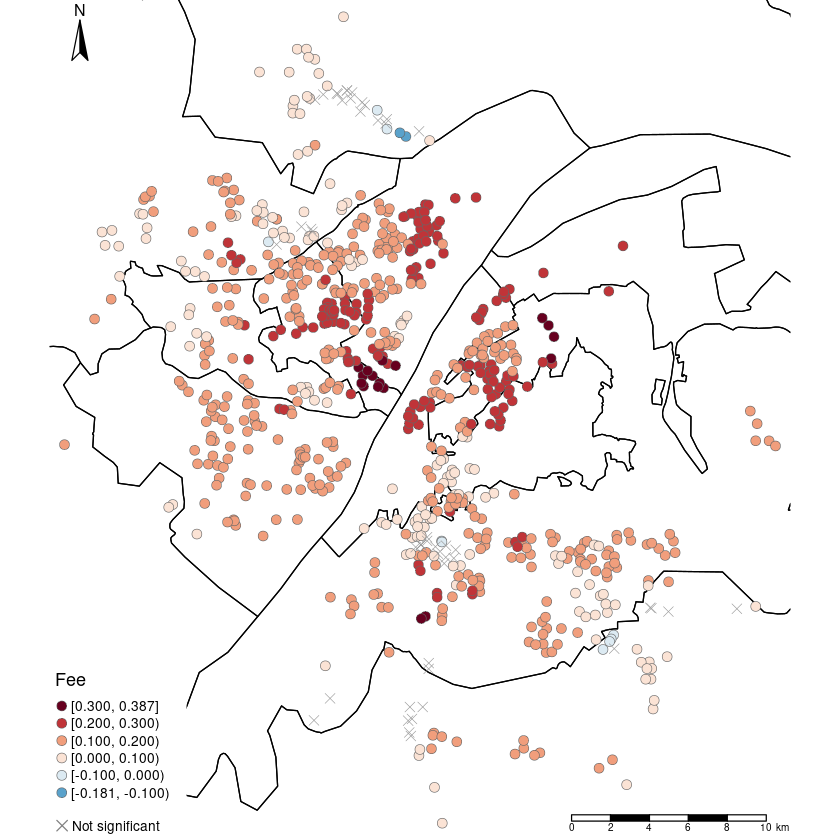

In [49]:
house.figure.Fee <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$Fee_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "Fee", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(Fee), seq(-0.1, 0.3, by = 0.1), max(Fee)))) +
    tm_shape(house.price.draw[house.price.draw@data$Fee_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = house.breaks.Floor.High) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.Fee

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


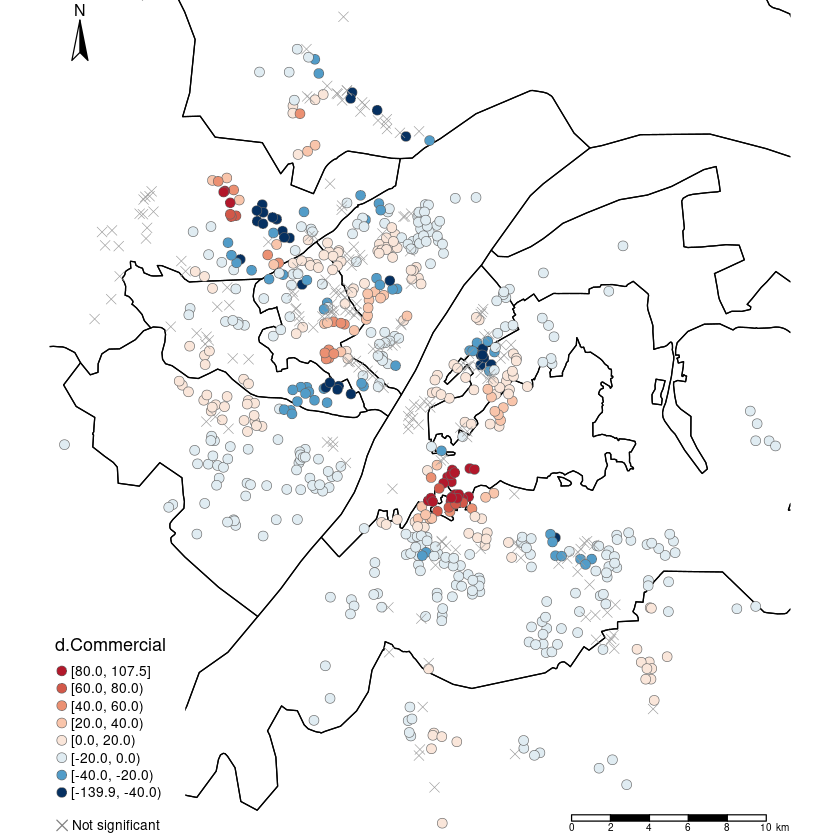

In [51]:
house.figure.d.Commercial <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$d.Commercial_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "d.Commercial", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Commercial), seq(-40, 80, by = 20), max(d.Commercial)))) +
    tm_shape(house.price.draw[house.price.draw@data$d.Commercial_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = house.breaks.Floor.High) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.d.Commercial

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


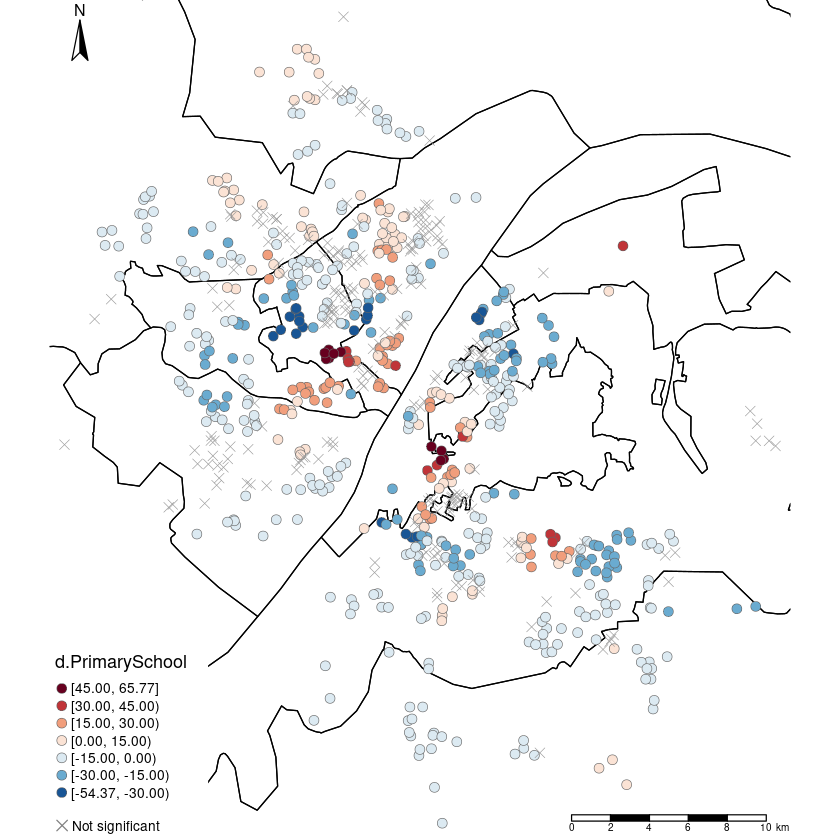

In [53]:
house.figure.d.PrimarySchool <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$d.PrimarySchool_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "d.PrimarySchool", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.PrimarySchool), seq(-30, 45, by = 15), max(d.PrimarySchool)))) +
    tm_shape(house.price.draw[house.price.draw@data$d.PrimarySchool_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = house.breaks.Floor.High) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.d.PrimarySchool

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


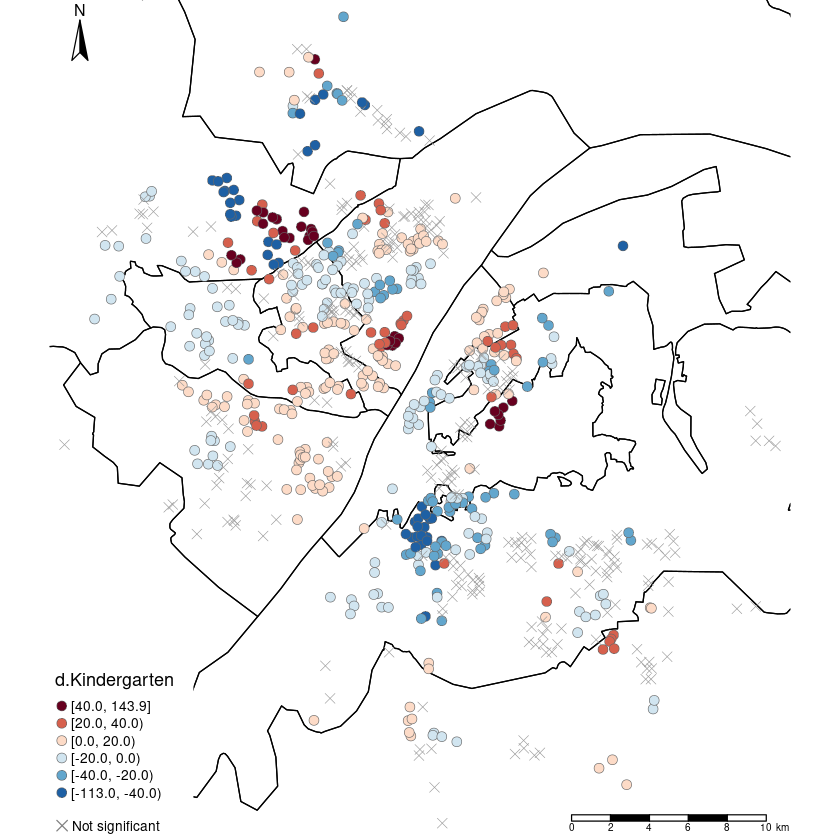

In [56]:
house.figure.d.Kindergarten <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$d.Kindergarten_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "d.Kindergarten", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Kindergarten), seq(-40, 40, by = 20), max(d.Kindergarten)))) +
    tm_shape(house.price.draw[house.price.draw@data$d.Kindergarten_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = house.breaks.Floor.High) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.d.Kindergarten

In [61]:
figure.coef.map <- list(
    "Intercept" = house.figure.Intercept, 
    "BuildingArea" = house.figure.BuildingArea, 
    "d.Water" = house.figure.d.Water, 
    "Fee" = house.figure.Fee, 
    "d.Commercial" = house.figure.d.Commercial, 
    "d.PrimarySchool" = house.figure.d.PrimarySchool, 
    "d.Kindergarten" = house.figure.d.Kindergarten, 
    "Floor.High" = house.figure.Floor.High
)

In [62]:
figure.coef.names <- c("Intercept", "d.Water", "Fee", "d.Commercial", "d.PrimarySchool", 
                       "d.Kindergarten", "BuildingArea", "Floor.High")
for (figure.coef.current in figure.coef.names) {
    print(figure.coef.current)
    tmap_save(figure.coef.map[[figure.coef.current]], 
              sprintf("Figure/GWR/GWR-coef-%s-%s-%s.png", house.gwr.cfg$kernel, house.gwr.cfg$adaptive, figure.coef.current), 
              width = 6, height = 6.2, family = "serif")
}

[1] "Intercept"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/GWR/GWR-coef-bisquare-adaptive-Intercept.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "d.Water"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/GWR/GWR-coef-bisquare-adaptive-d.Water.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "Fee"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/GWR/GWR-coef-bisquare-adaptive-Fee.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "d.Commercial"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/GWR/GWR-coef-bisquare-adaptive-d.Commercial.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "d.PrimarySchool"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/GWR/GWR-coef-bisquare-adaptive-d.PrimarySchool.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "d.Kindergarten"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/GWR/GWR-coef-bisquare-adaptive-d.Kindergarten.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "BuildingArea"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/GWR/GWR-coef-bisquare-adaptive-BuildingArea.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "Floor.High"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/GWR/GWR-coef-bisquare-adaptive-Floor.High.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



## 残差

In [17]:
### 生成残差数据
house.price.draw.resudial <- as.data.frame(cbind(
    group = house.price.draw$Group,
    residual.mean = aggregate(residual ~ group, data = cbind(group = house.price.dummy$group, house.gwr$SDF@data), FUN = mean)$residual,
    residual.vars = aggregate(residual ~ group, data = cbind(group = house.price.dummy$group, house.gwr$SDF@data), FUN = var)$residual,
    house.price.draw@coords
))
coordinates(house.price.draw.resudial) <- ~ lon + lat
proj4string(house.price.draw.resudial) <- CRS("+proj=longlat +datum=WGS84")
head(house.price.draw.resudial@data)

,group,residual.mean,residual.vars
,<dbl>,<dbl>,<dbl>
1,0,-0.045606405,0.004272557
2,1,0.015571223,0.002915327
3,2,-0.002056969,0.005362728
4,4,-0.072065305,0.012657719
5,6,-0.313467474,0.048432328
6,9,0.006892091,0.007131494
